# Data formating (pre-processing)

We will use in this lab a dataset used in a competition at https://www.datascience.net. The aim is to assign a credit score Y to customer according to some characteristics. We will measure the performance of our methods with either the raw prediction error or the AUC (Area Under Curve) criterion.

Read CreditTraining.csv and check it with glimpse

In [3]:
options(warn=-1)
library("tidyverse") #Data Science Library in R

CreditTraining <- read_csv("CreditTraining.csv",
                           locale = locale(decimal_mark = ","))
glimpse(CreditTraining)


Parsed with column specification:
cols(
  Id_Customer = col_integer(),
  Y = col_integer(),
  Customer_Type = col_character(),
  BirthDate = col_character(),
  Customer_Open_Date = col_character(),
  P_Client = col_character(),
  Educational_Level = col_character(),
  Marital_Status = col_character(),
  Number_Of_Dependant = col_integer(),
  Years_At_Residence = col_integer(),
  Net_Annual_Income = col_double(),
  Years_At_Business = col_integer(),
  Prod_Sub_Category = col_character(),
  Prod_Decision_Date = col_character(),
  Source = col_character(),
  Type_Of_Residence = col_character(),
  Nb_Of_Products = col_integer(),
  Prod_Closed_Date = col_character(),
  Prod_Category = col_character()
)


Observations: 5,380
Variables: 19
$ Id_Customer         <int> 7440, 573, 9194, 3016, 6524, 3858, 2189, 9338, ...
$ Y                   <int> 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...
$ Customer_Type       <chr> "Non Existing Client", "Existing Client", "Non ...
$ BirthDate           <chr> "07/08/1977", "13/06/1974", "07/11/1973", "08/0...
$ Customer_Open_Date  <chr> "13/02/2012", "04/02/2009", "03/04/2012", "25/0...
$ P_Client            <chr> "NP_Client", "P_Client", "NP_Client", "NP_Clien...
$ Educational_Level   <chr> "University", "University", "University", "Univ...
$ Marital_Status      <chr> "Married", "Married", "Married", "Married", "Ma...
$ Number_Of_Dependant <int> 3, 0, 2, 3, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,...
$ Years_At_Residence  <int> 1, 12, 10, 3, 1, 28, 10, 15, 0, 35, 10, 10, 2, ...
$ Net_Annual_Income   <dbl> 36.000, 18.000, 36.000, 36.000, 36.000, 60.000,...
$ Years_At_Business   <int> 1, 2, 1, 1, 1, 2, 1, 1, 3, 2, 3, 2, 4, 1, 1, 1,...
$ Prod_Sub_Categor

# Categorize variables

In [4]:
Fix_Type <- function(Credit) {
Credit <- dplyr::mutate(Credit, Id_Customer = factor(Id_Customer),
                        Y = factor(Y),
                        BirthDate = lubridate::dmy(BirthDate),
                        Customer_Open_Date = lubridate::dmy(Customer_Open_Date),
                         Prod_Decision_Date = lubridate::dmy(Prod_Decision_Date),
                        Prod_Closed_Date = lubridate::dmy(Prod_Closed_Date))
}
CreditTraining <- Fix_Type(CreditTraining)

In [5]:
glimpse(CreditTraining)

Observations: 5,380
Variables: 19
$ Id_Customer         <fctr> 7440, 573, 9194, 3016, 6524, 3858, 2189, 9338,...
$ Y                   <fctr> 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...
$ Customer_Type       <chr> "Non Existing Client", "Existing Client", "Non ...
$ BirthDate           <date> 1977-08-07, 1974-06-13, 1973-11-07, 1982-07-08...
$ Customer_Open_Date  <date> 2012-02-13, 2009-02-04, 2012-04-03, 2011-08-25...
$ P_Client            <chr> "NP_Client", "P_Client", "NP_Client", "NP_Clien...
$ Educational_Level   <chr> "University", "University", "University", "Univ...
$ Marital_Status      <chr> "Married", "Married", "Married", "Married", "Ma...
$ Number_Of_Dependant <int> 3, 0, 2, 3, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,...
$ Years_At_Residence  <int> 1, 12, 10, 3, 1, 28, 10, 15, 0, 35, 10, 10, 2, ...
$ Net_Annual_Income   <dbl> 36.000, 18.000, 36.000, 36.000, 36.000, 60.000,...
$ Years_At_Business   <int> 1, 2, 1, 1, 1, 2, 1, 1, 3, 2, 3, 2, 4, 1, 1, 1,...
$ Prod_Sub_Categor

In [6]:
summary(CreditTraining)

  Id_Customer   Y        Customer_Type        BirthDate         
 1      :   1   0:4987   Length:5380        Min.   :1937-12-06  
 3      :   1   1: 393   Class :character   1st Qu.:1963-10-08  
 4      :   1            Mode  :character   Median :1973-10-07  
 6      :   1                               Mean   :1972-04-04  
 7      :   1                               3rd Qu.:1981-06-21  
 8      :   1                               Max.   :1990-11-07  
 (Other):5374                                                   
 Customer_Open_Date     P_Client         Educational_Level  Marital_Status    
 Min.   :1982-03-04   Length:5380        Length:5380        Length:5380       
 1st Qu.:2010-12-01   Class :character   Class :character   Class :character  
 Median :2011-09-04   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2010-08-08                                                           
 3rd Qu.:2011-12-26                                                           
 Max. 

In [7]:
Fix_Levels <- function(Credit) {
  Credit <- dplyr::mutate(Credit, Y = factor(Y, levels = c(1,0), 
                                      labels = c("DEFAULT","NO_DEFAULT")),
                          Customer_Type = factor(Customer_Type, 
                                                  levels = c("Non Existing Client", "Existing Client")),
                          Educational_Level = factor(Educational_Level, 
                                            levels = c("Secondary or Less",
                                                       "Diploma",
                                                       "University",
                                                       "Master/PhD")))
}
CreditTraining <- Fix_Levels(CreditTraining)

summary(CreditTraining)


  Id_Customer            Y                    Customer_Type 
 1      :   1   DEFAULT   : 393   Non Existing Client:3369  
 3      :   1   NO_DEFAULT:4987   Existing Client    :2011  
 4      :   1                                               
 6      :   1                                               
 7      :   1                                               
 8      :   1                                               
 (Other):5374                                               
   BirthDate          Customer_Open_Date     P_Client        
 Min.   :1937-12-06   Min.   :1982-03-04   Length:5380       
 1st Qu.:1963-10-08   1st Qu.:2010-12-01   Class :character  
 Median :1973-10-07   Median :2011-09-04   Mode  :character  
 Mean   :1972-04-04   Mean   :2010-08-08                     
 3rd Qu.:1981-06-21   3rd Qu.:2011-12-26                     
 Max.   :1990-11-07   Max.   :2012-04-26                     
                                                             
         Educati

### examine each variable individually to see if something is wrong.

          Y       
 DEFAULT   : 393  
 NO_DEFAULT:4987  
             Customer_Type 
 Non Existing Client:3369  
 Existing Client    :2011  


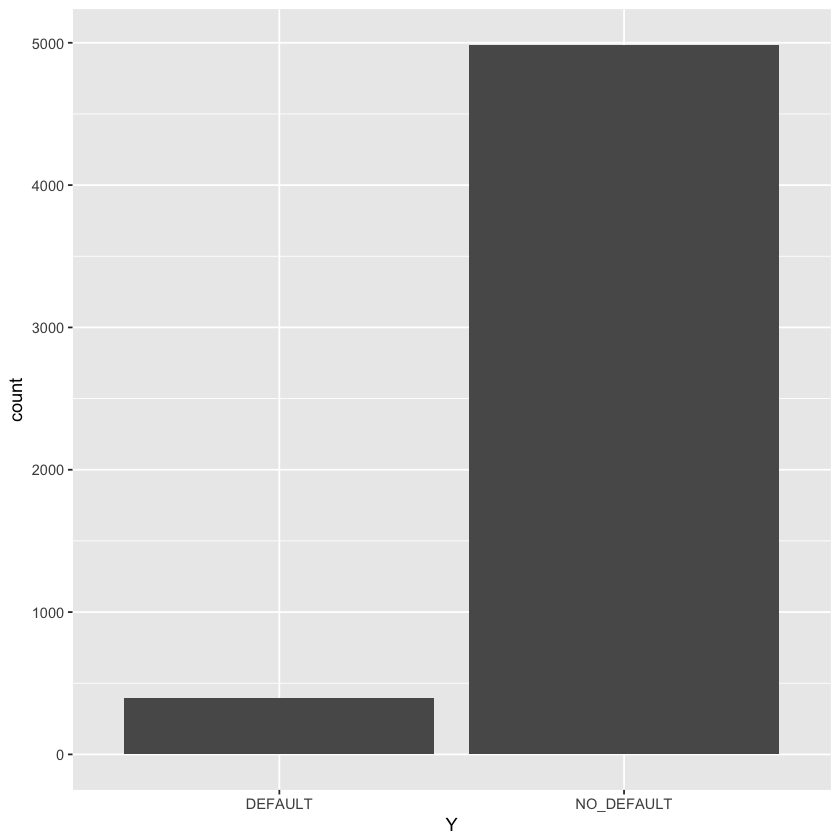

   BirthDate         
 Min.   :1937-12-06  
 1st Qu.:1963-10-08  
 Median :1973-10-07  
 Mean   :1972-04-04  
 3rd Qu.:1981-06-21  
 Max.   :1990-11-07  


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


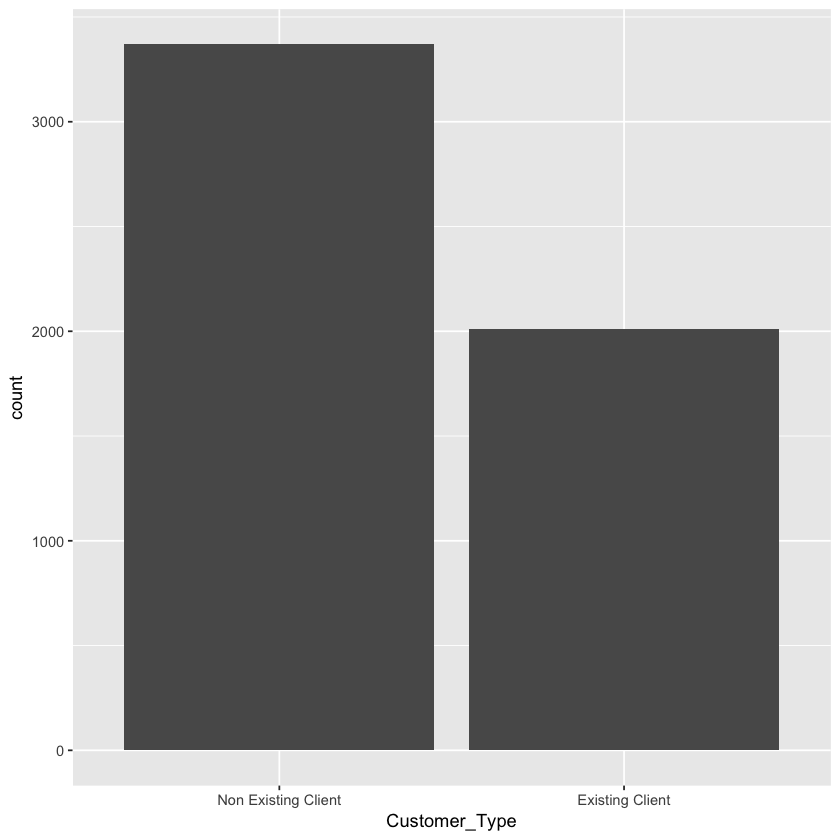

 Customer_Open_Date  
 Min.   :1982-03-04  
 1st Qu.:2010-12-01  
 Median :2011-09-04  
 Mean   :2010-08-08  
 3rd Qu.:2011-12-26  
 Max.   :2012-04-26  


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


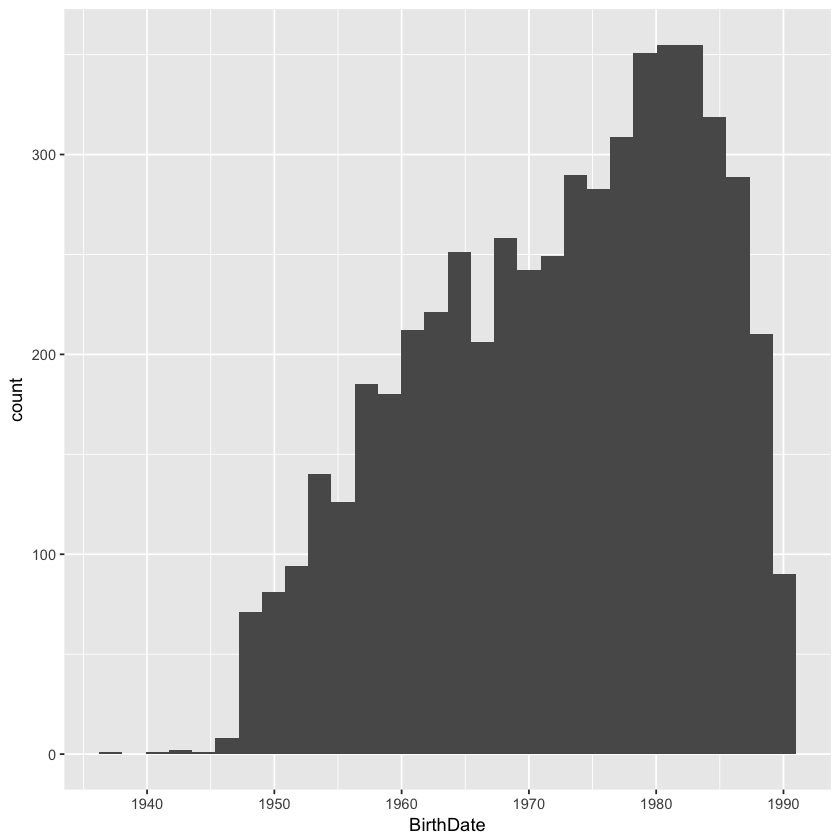

   P_Client        
 Length:5380       
 Class :character  
 Mode  :character  


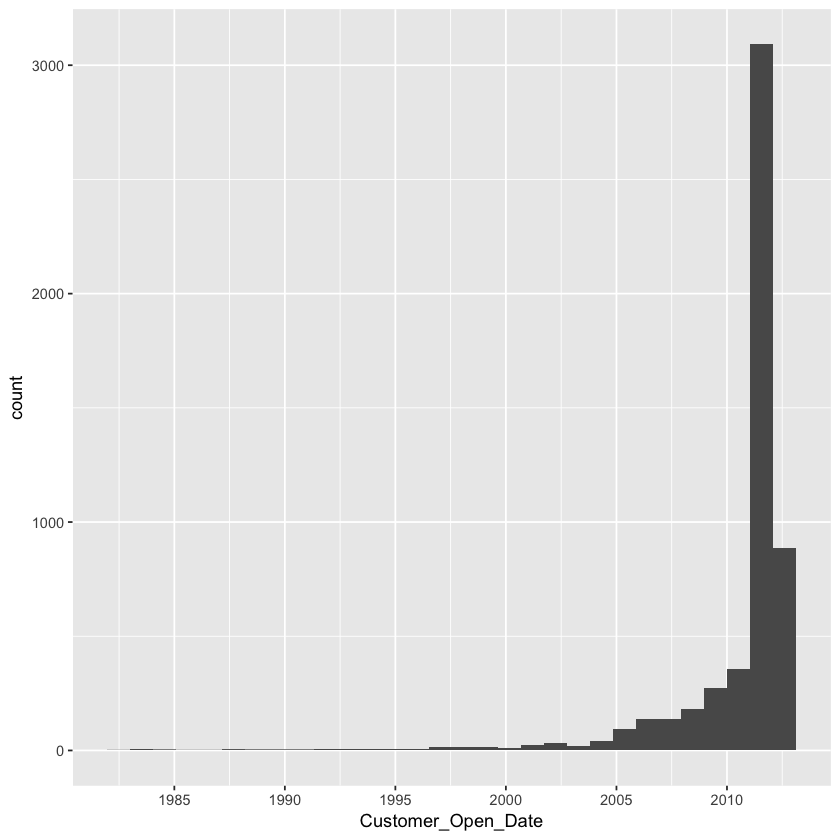

         Educational_Level
 Secondary or Less:  15   
 Diploma          :  58   
 University       :4785   
 Master/PhD       : 522   


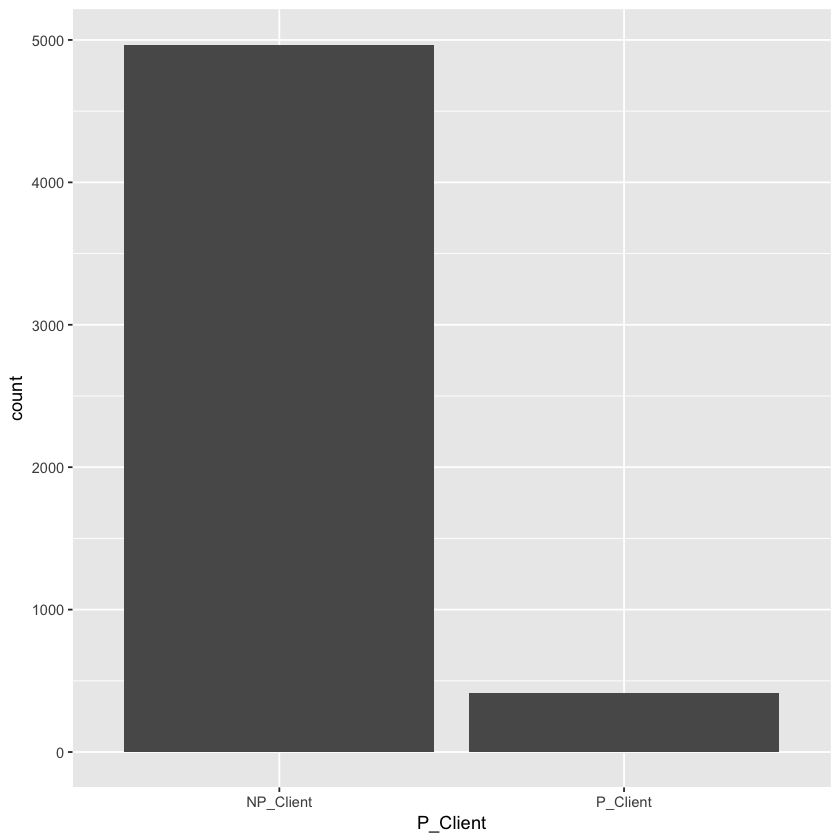

 Marital_Status    
 Length:5380       
 Class :character  
 Mode  :character  


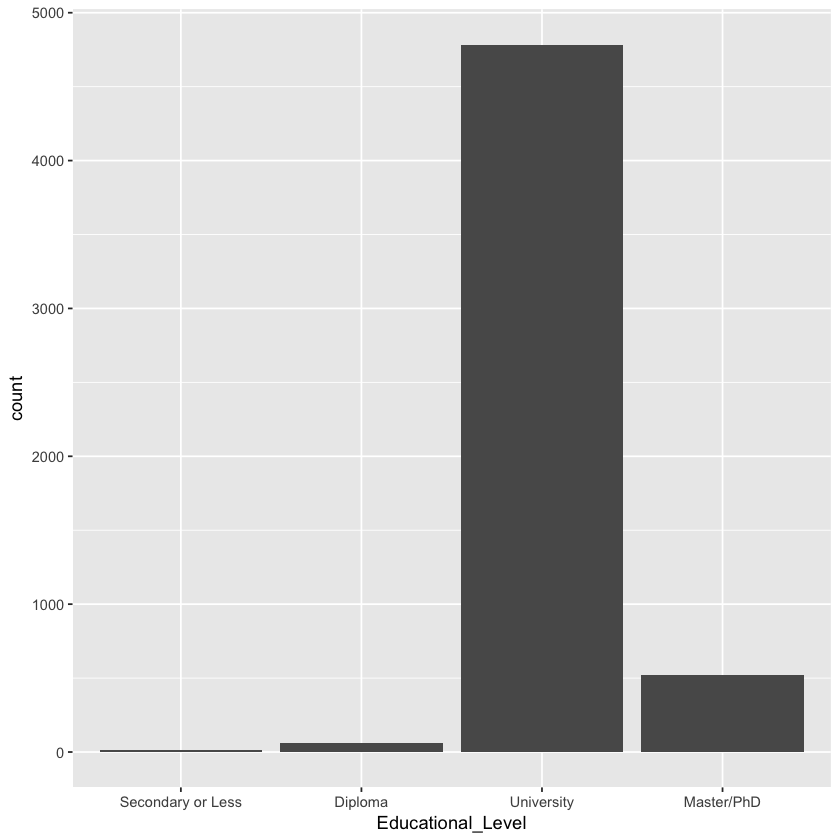

 Number_Of_Dependant
 Min.   : 0.000     
 1st Qu.: 0.000     
 Median : 0.000     
 Mean   : 1.059     
 3rd Qu.: 2.000     
 Max.   :20.000     
 NA's   :2          
Number_Of_Dependant has 2 NA


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


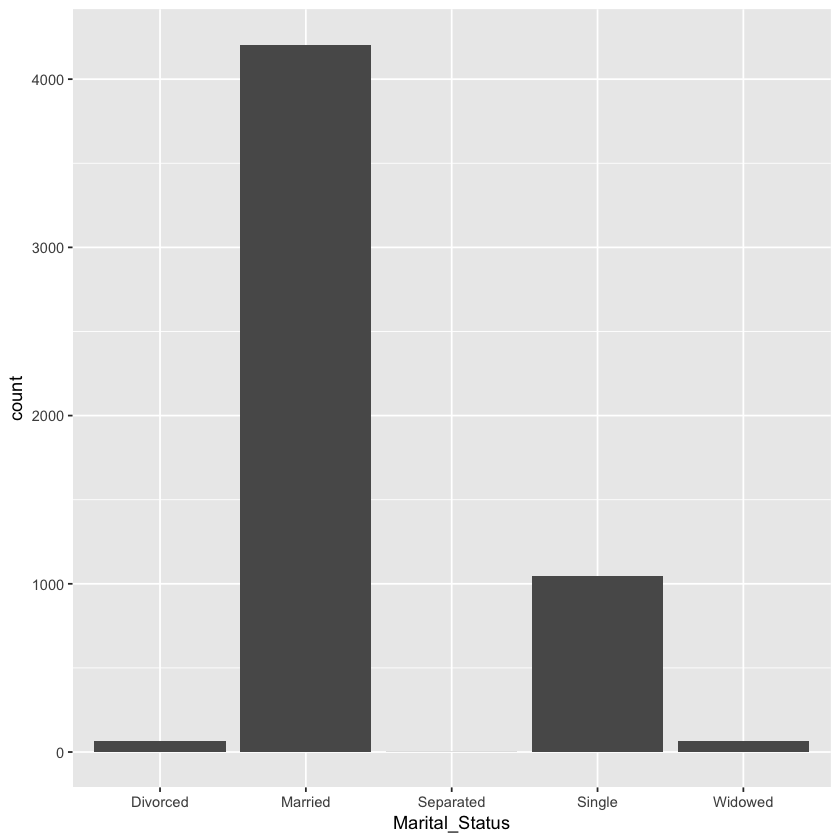

 Years_At_Residence
 Min.   : 0.00     
 1st Qu.: 4.00     
 Median :10.00     
 Mean   :12.63     
 3rd Qu.:18.00     
 Max.   :70.00     


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


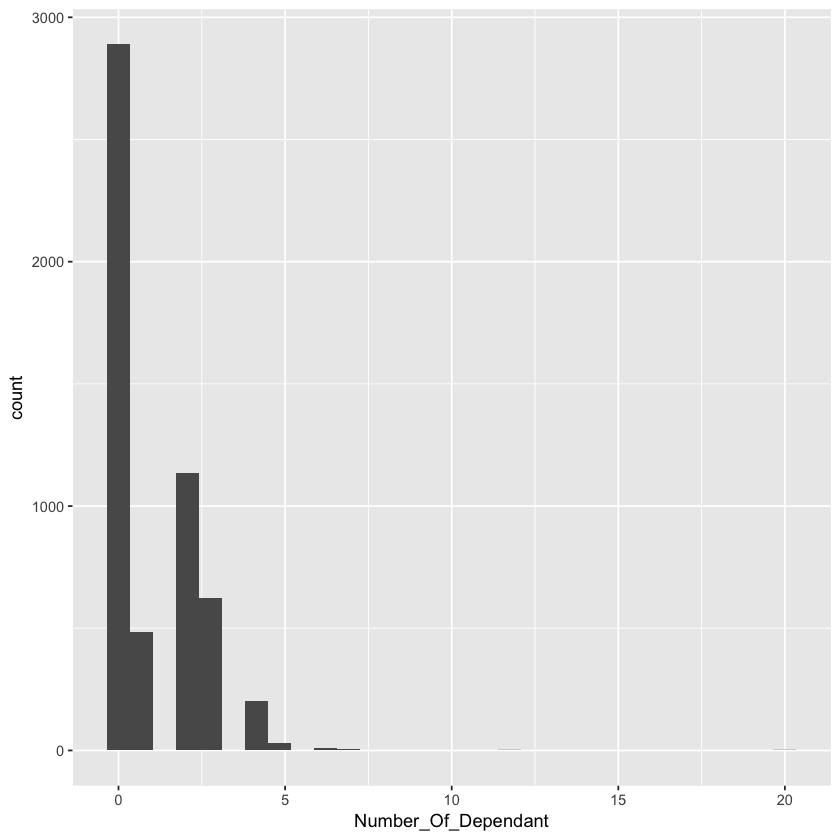

 Net_Annual_Income  
 Min.   :    0.004  
 1st Qu.:   20.000  
 Median :   36.000  
 Mean   :   61.182  
 3rd Qu.:   36.000  
 Max.   :10000.000  
 NA's   :2          
Net_Annual_Income has 2 NA


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


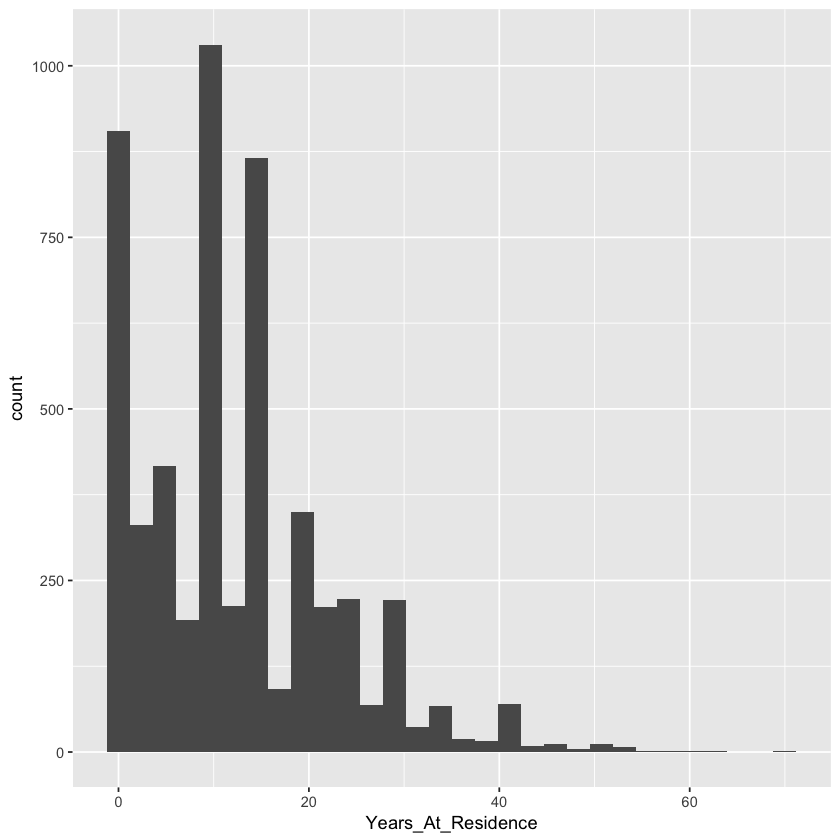

 Years_At_Business
 Min.   : 0.000   
 1st Qu.: 1.000   
 Median : 1.000   
 Mean   : 4.266   
 3rd Qu.: 4.000   
 Max.   :98.000   
 NA's   :2        
Years_At_Business has 2 NA


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


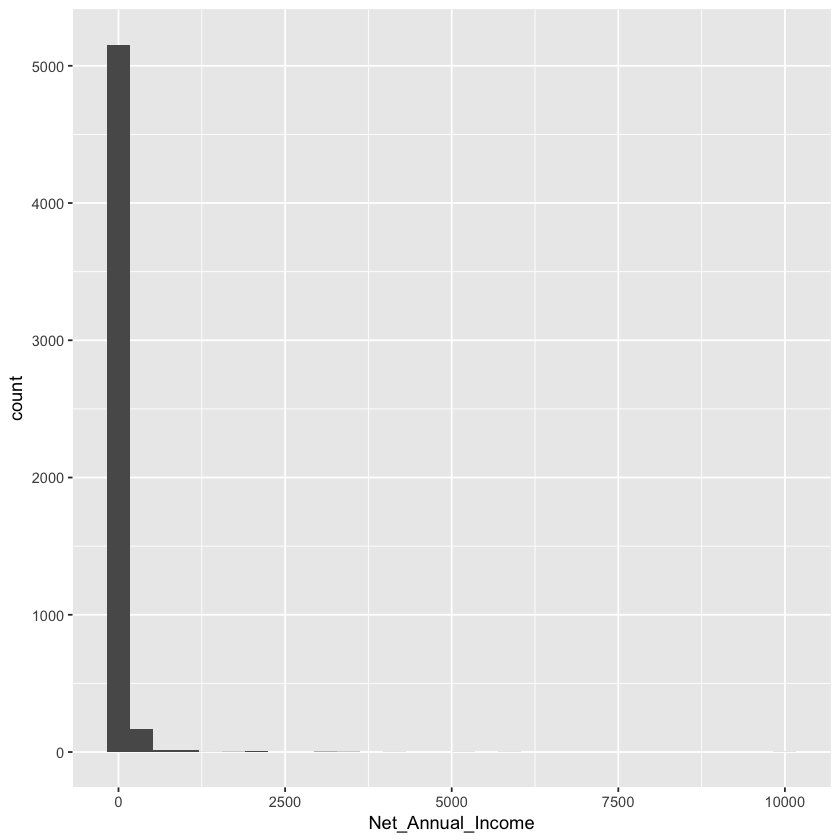

 Prod_Sub_Category 
 Length:5380       
 Class :character  
 Mode  :character  


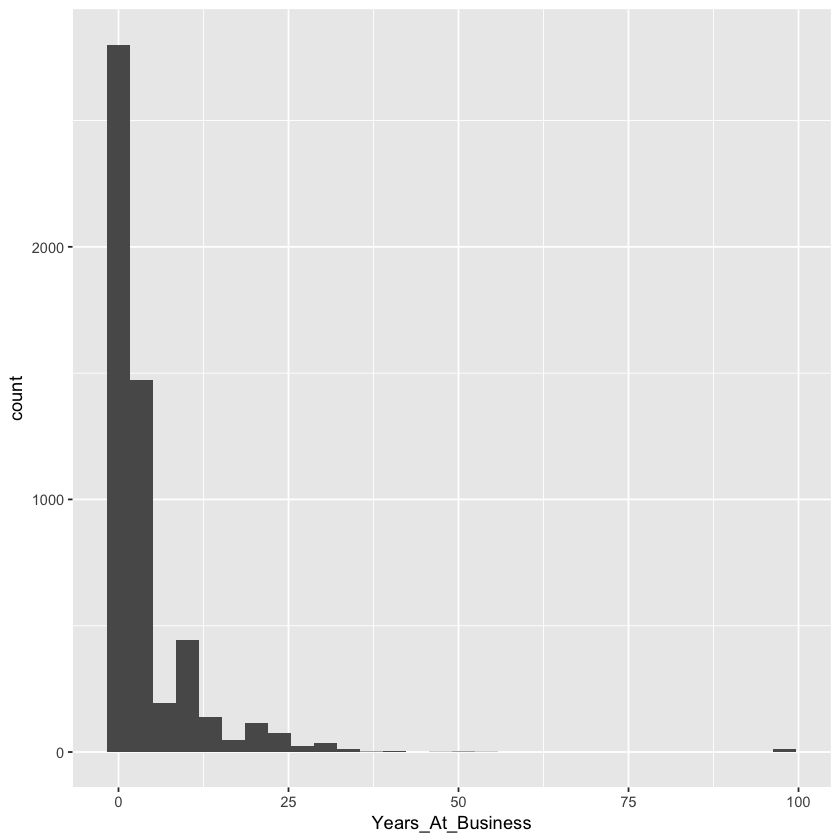

 Prod_Decision_Date  
 Min.   :2011-05-02  
 1st Qu.:2011-08-15  
 Median :2011-11-09  
 Mean   :2011-11-09  
 3rd Qu.:2012-02-09  
 Max.   :2012-04-28  


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


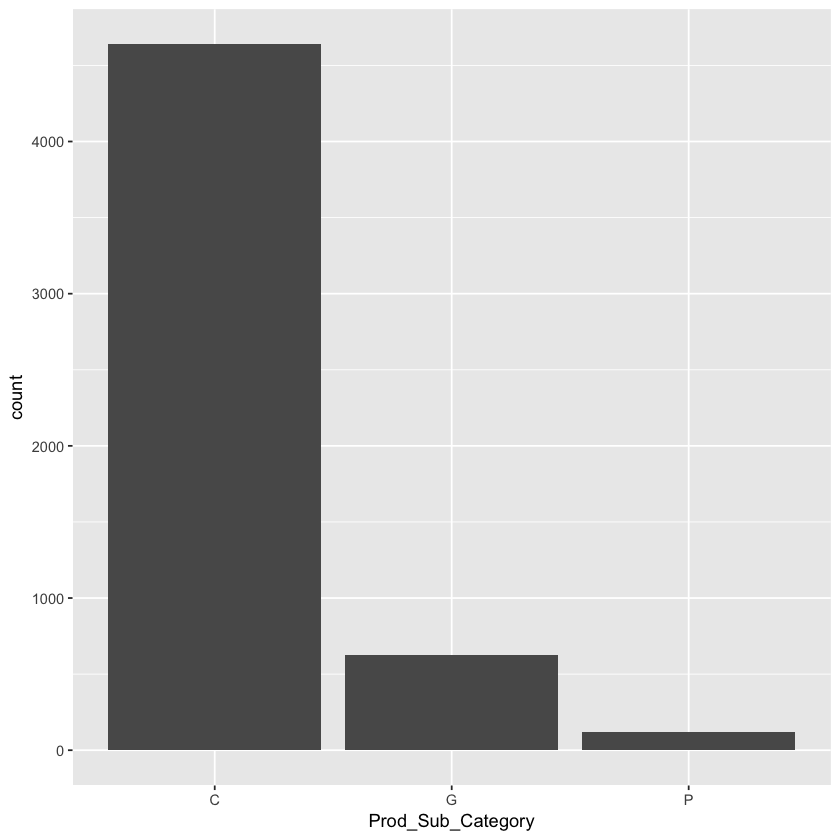

    Source         
 Length:5380       
 Class :character  
 Mode  :character  


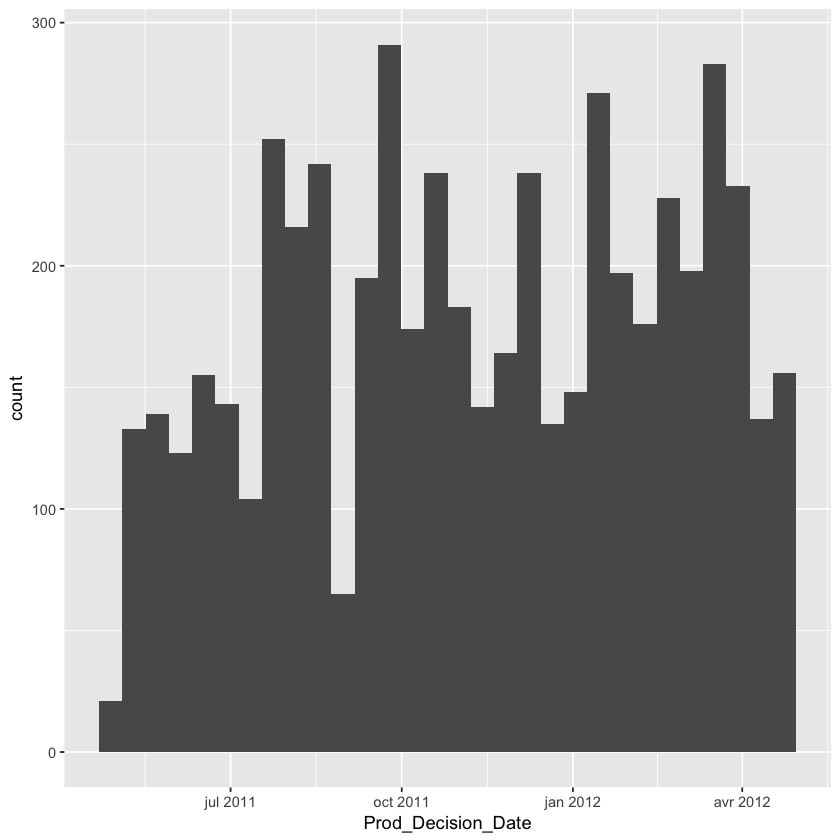

 Type_Of_Residence 
 Length:5380       
 Class :character  
 Mode  :character  


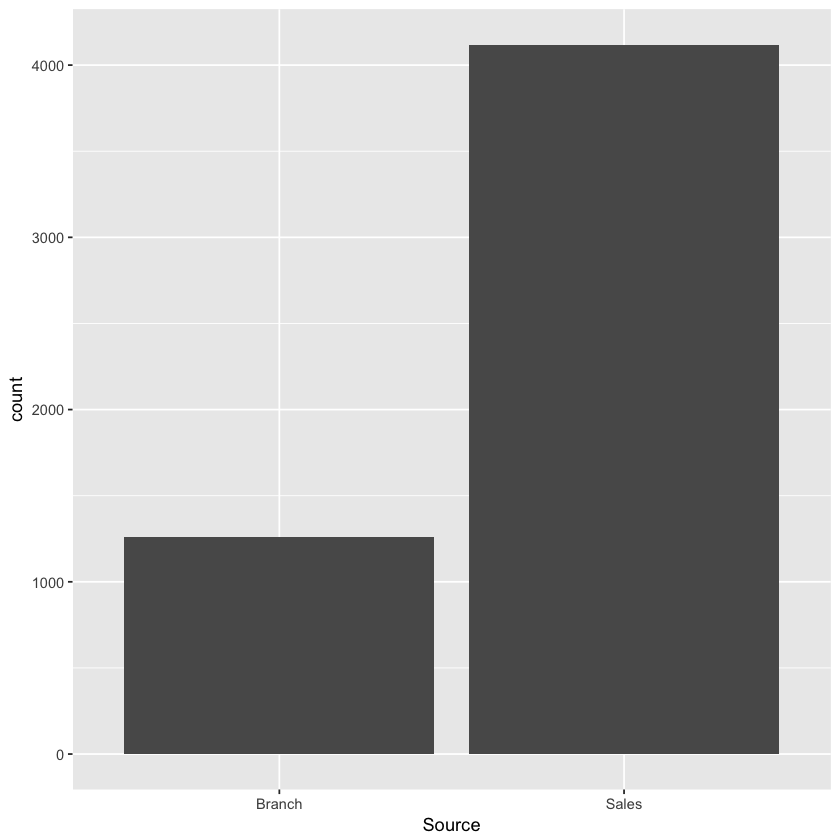

 Nb_Of_Products 
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.089  
 3rd Qu.:1.000  
 Max.   :3.000  


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


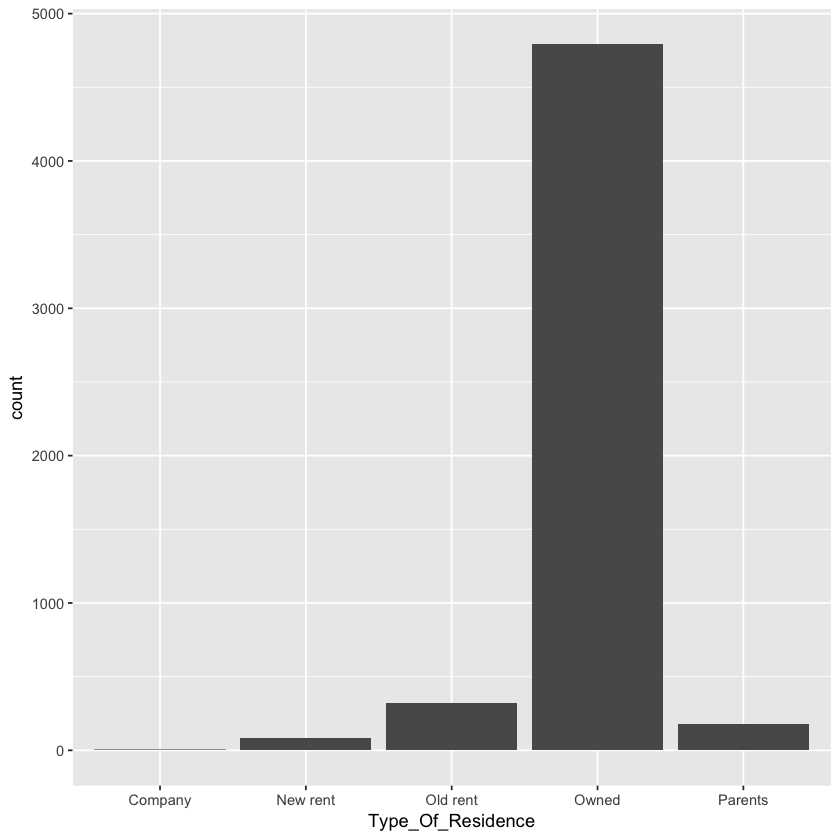

 Prod_Closed_Date    
 Min.   :2011-10-31  
 1st Qu.:2012-07-31  
 Median :2012-11-29  
 Mean   :2012-11-19  
 3rd Qu.:2013-03-26  
 Max.   :2013-06-02  
Prod_Closed_Date has 4206 NA


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


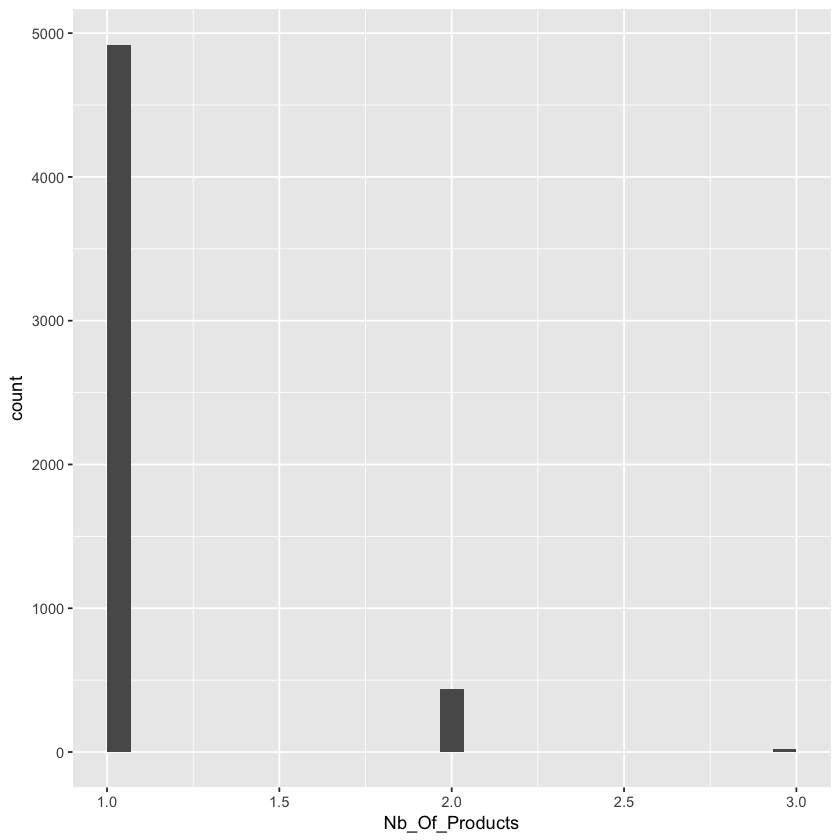

 Prod_Category     
 Length:5380       
 Class :character  
 Mode  :character  


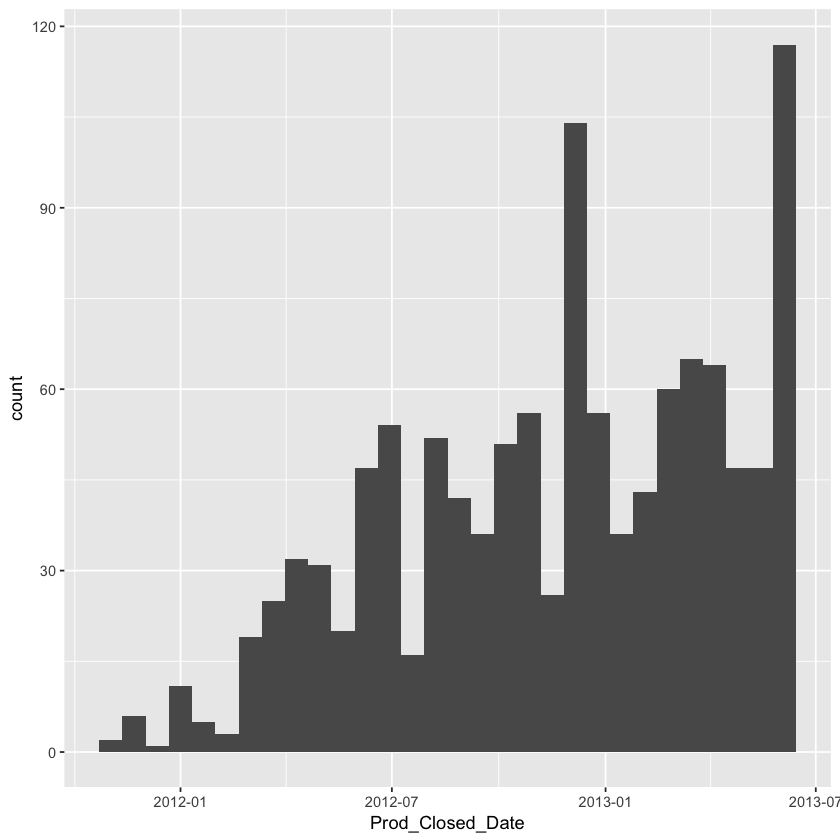

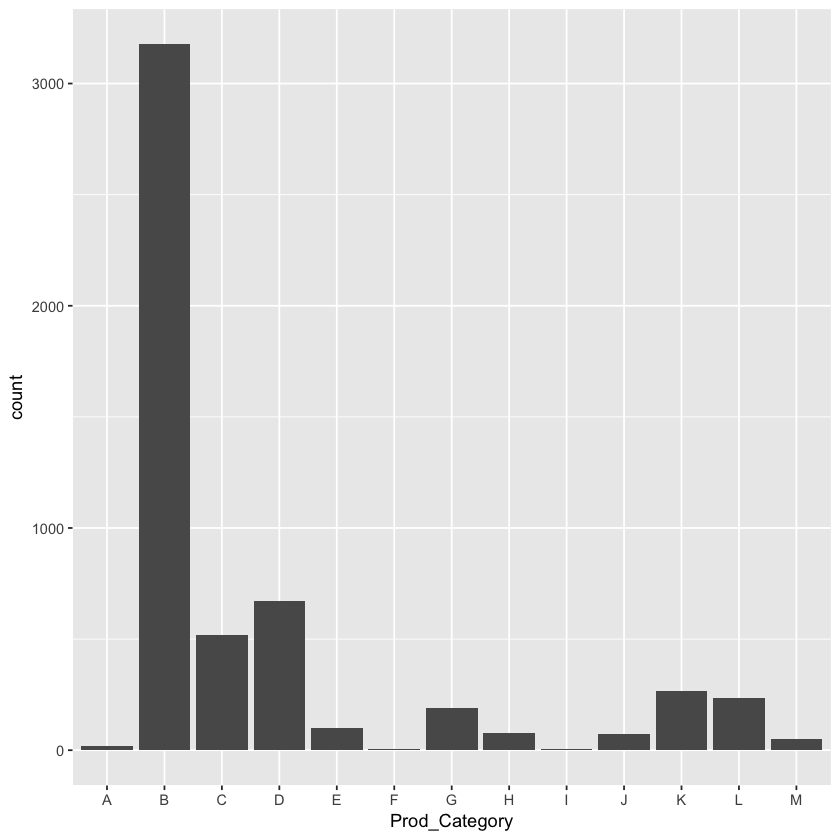

In [8]:
nameCreditTraining <- names(CreditTraining)
for (varname in nameCreditTraining[-1]) {
  print(summary(dplyr::select(CreditTraining, one_of(varname))))
  NbNa <-sum(is.na(CreditTraining[[varname]])); 
  if (NbNa >0) {
    writeLines(strwrap(paste("\n",varname,"has",NbNa, "NA")))
  }
  print(qplot(data = CreditTraining, get(varname), xlab = varname))
}

- Customer_Open_Date: a strange peak,
- Number_Of_Dependant: 2 NAs (Not Available) and a strange 20 value,
- Net_Annual_Income: 2 NAs and some strange small and large values,
- Years_At_Business: 2 NAs and a strange 98 value,
- Prod_Closed_Date: 4206 NAs!

Next Step is to fix those NAs:

In [9]:
#Auxilary function to compute Median and Mode

ComputeMedianOrMode <- function(x){
    if(is.factor(x)) {
        y=levels(x)[which.max(table(x))]
    }
    else{
        y=median(x,na.rm=TRUE)
    }
    return(y)
}

In [10]:
# Get all Medians and Means

NAvalue=list()
for (name in names(CreditTraining)) {
  NAvalue[[name]]=ComputeMedianOrMode(CreditTraining[[name]])
}
NAvalue[["Prod_Closed_Date"]] <- NULL

summary(NAvalue)

                    Length Class  Mode     
Id_Customer         1      -none- character
Y                   1      -none- character
Customer_Type       1      -none- character
BirthDate           1      Date   numeric  
Customer_Open_Date  1      Date   numeric  
P_Client            1      -none- numeric  
Educational_Level   1      -none- character
Marital_Status      1      -none- numeric  
Number_Of_Dependant 1      -none- numeric  
Years_At_Residence  1      -none- numeric  
Net_Annual_Income   1      -none- numeric  
Years_At_Business   1      -none- numeric  
Prod_Sub_Category   1      -none- numeric  
Prod_Decision_Date  1      Date   numeric  
Source              1      -none- numeric  
Type_Of_Residence   1      -none- numeric  
Nb_Of_Products      1      -none- numeric  
Prod_Category       1      -none- numeric  

In [11]:
# Fix all NAs

Fix_NA <- function(Credit, NAvalue_ = NAvalue) {
  for (name  in names(NAvalue_)) {
    Credit[[name]][is.na(Credit[[name]])]=unlist(NAvalue_[[name]])
  }
  Credit
}
CreditTraining <- Fix_NA(CreditTraining)
summary(CreditTraining)

  Id_Customer            Y                    Customer_Type 
 1      :   1   DEFAULT   : 393   Non Existing Client:3369  
 3      :   1   NO_DEFAULT:4987   Existing Client    :2011  
 4      :   1                                               
 6      :   1                                               
 7      :   1                                               
 8      :   1                                               
 (Other):5374                                               
   BirthDate          Customer_Open_Date     P_Client        
 Min.   :1937-12-06   Min.   :1982-03-04   Length:5380       
 1st Qu.:1963-10-08   1st Qu.:2010-12-01   Class :character  
 Median :1973-10-07   Median :2011-09-04   Mode  :character  
 Mean   :1972-04-04   Mean   :2010-08-08                     
 3rd Qu.:1981-06-21   3rd Qu.:2011-12-26                     
 Max.   :1990-11-07   Max.   :2012-04-26                     
                                                             
         Educati

In [12]:
# Proc_Closed_Date is almost all NA, so we take the max on this var

Fix_Prod_Closed_Date <- function(Credit) {
  Credit <- dplyr::mutate(Credit, Prod_Closed_Date_NA = is.na(Prod_Closed_Date))
  Credit[["Prod_Closed_Date"]][Credit$Prod_Closed_Date_NA] = max(Credit[["Prod_Closed_Date"]], na.rm = TRUE)
  Credit
}
CreditTraining <- Fix_Prod_Closed_Date(CreditTraining)



Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


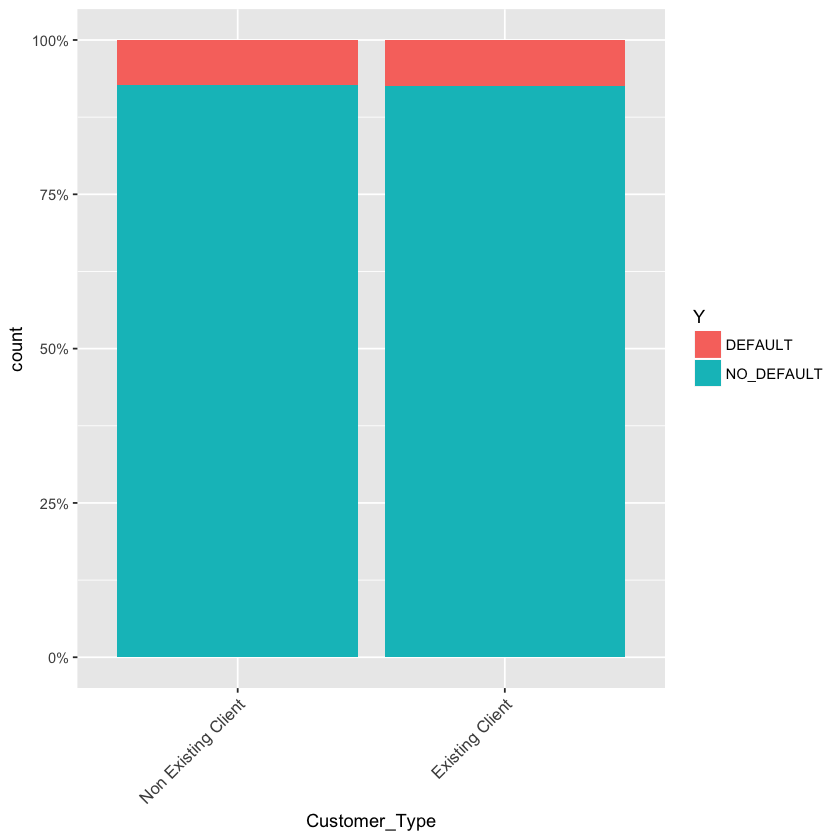

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


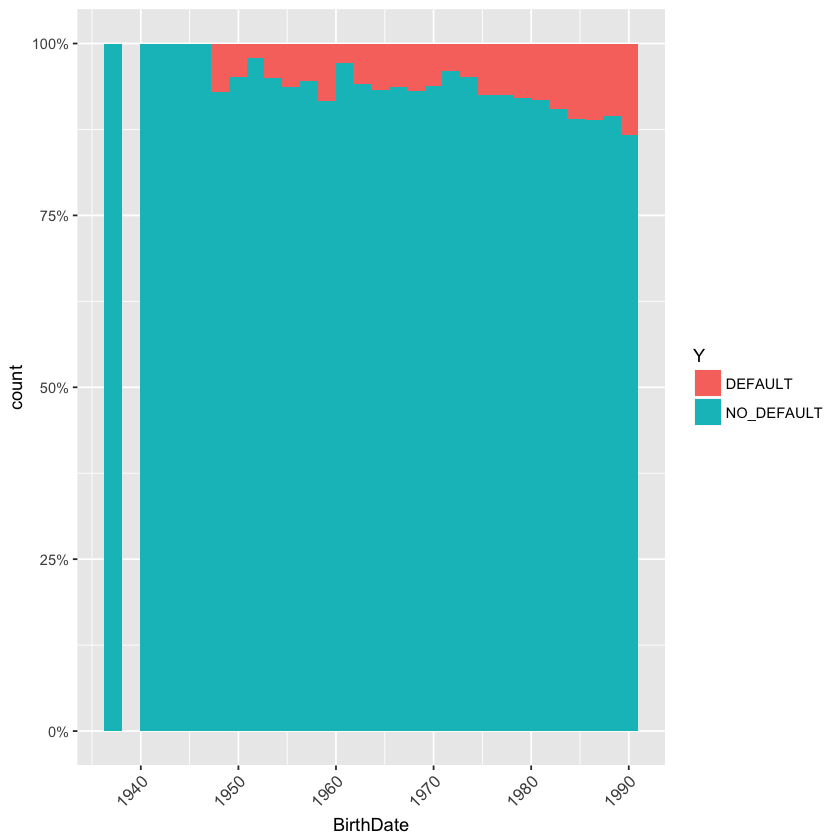

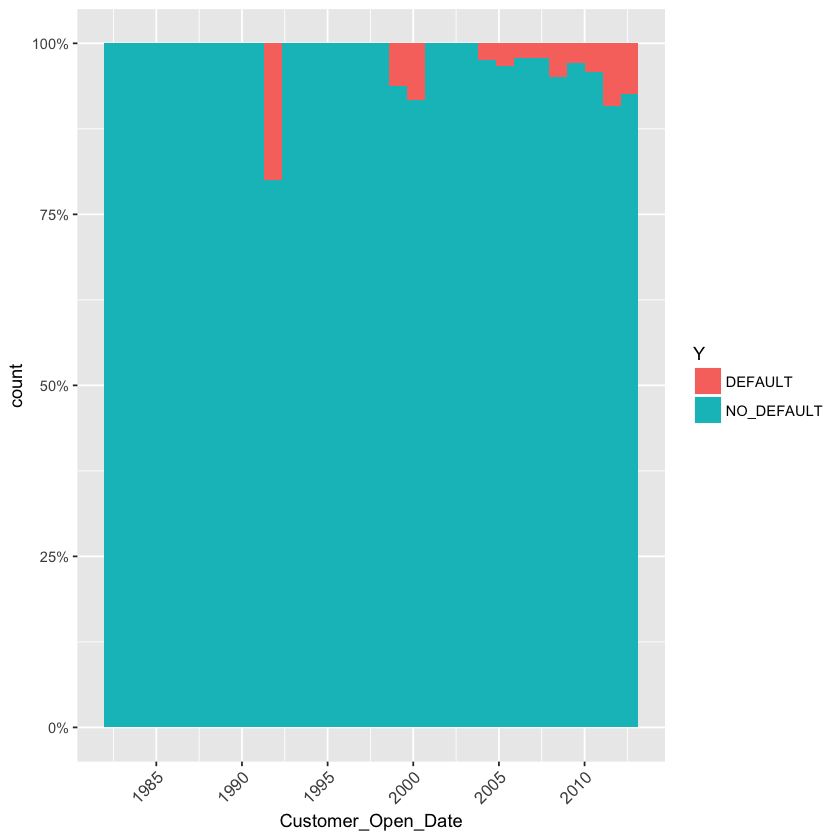

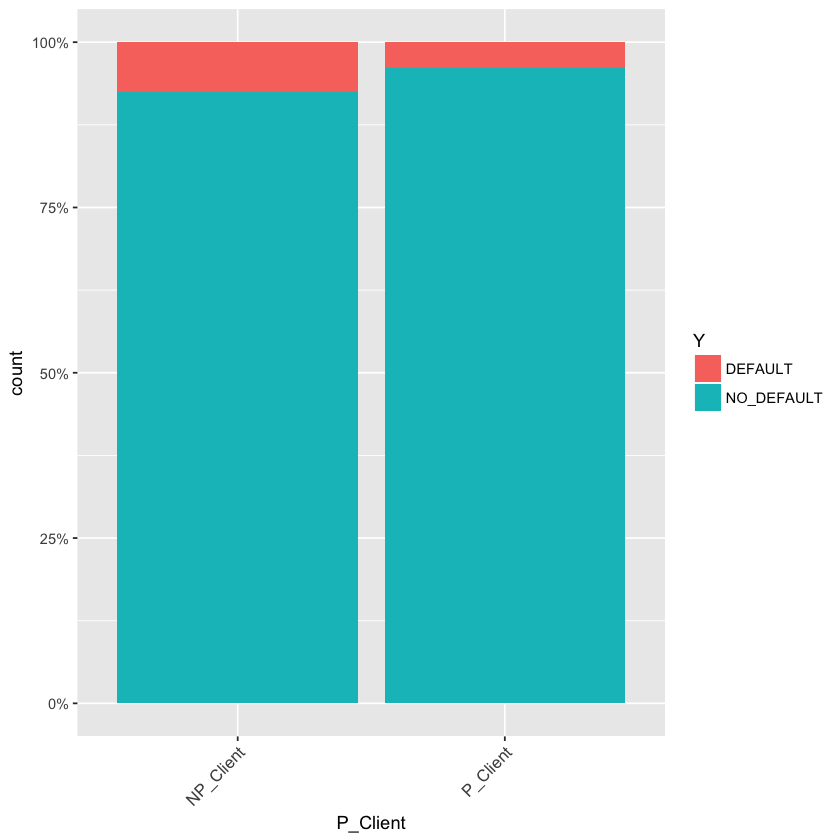

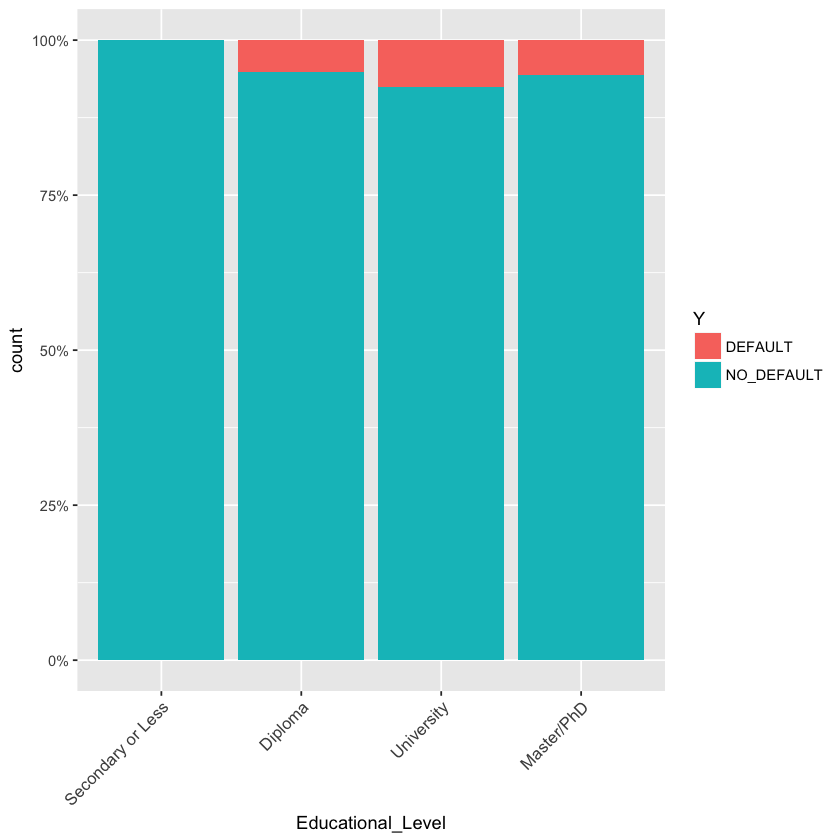

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


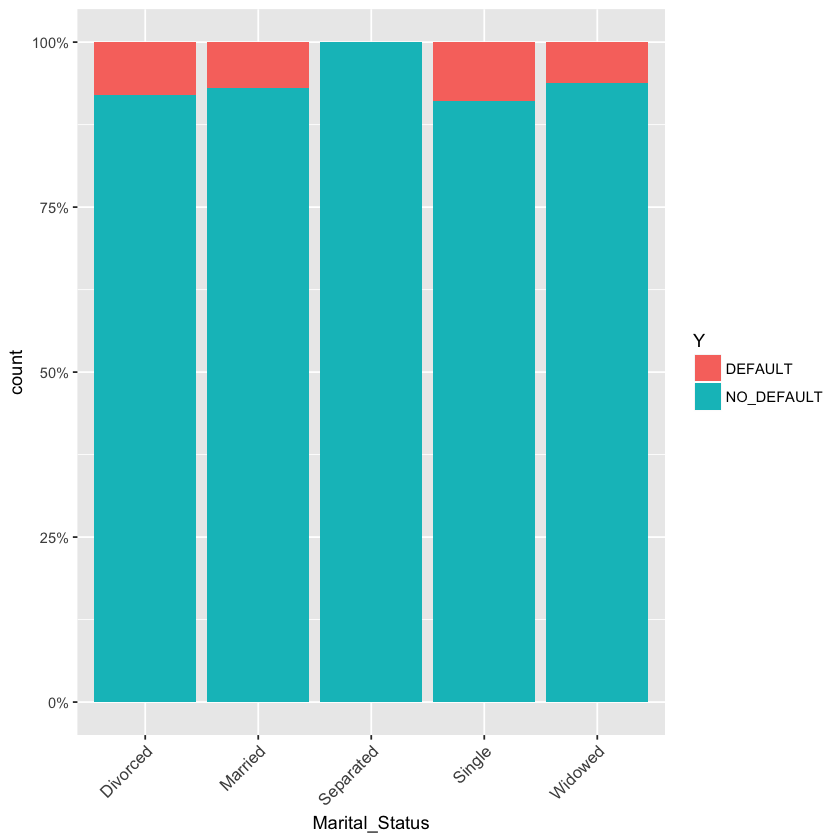

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


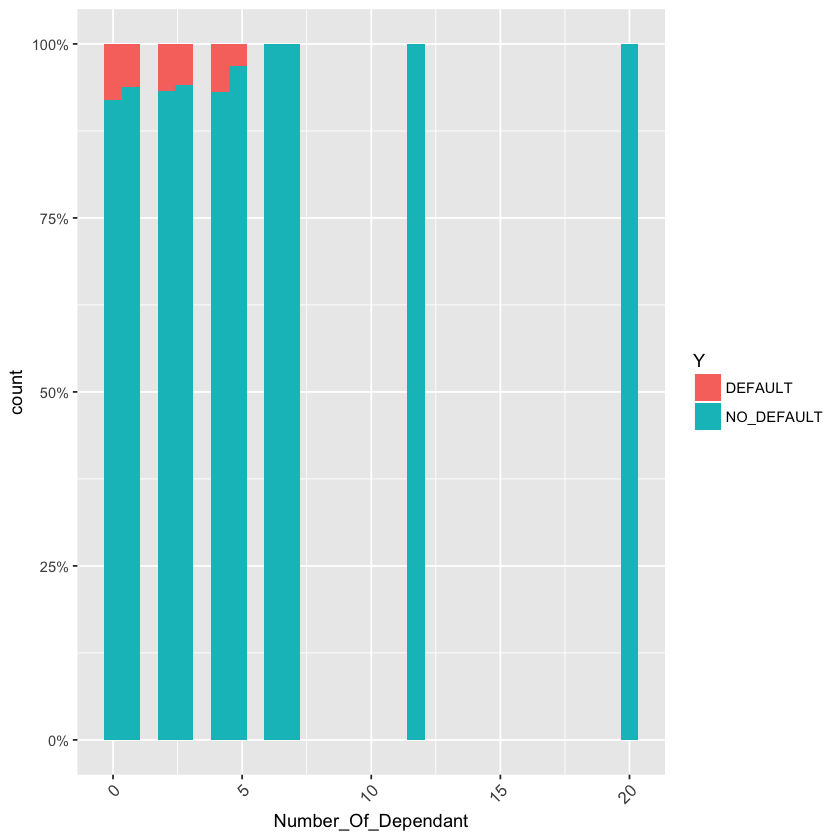

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


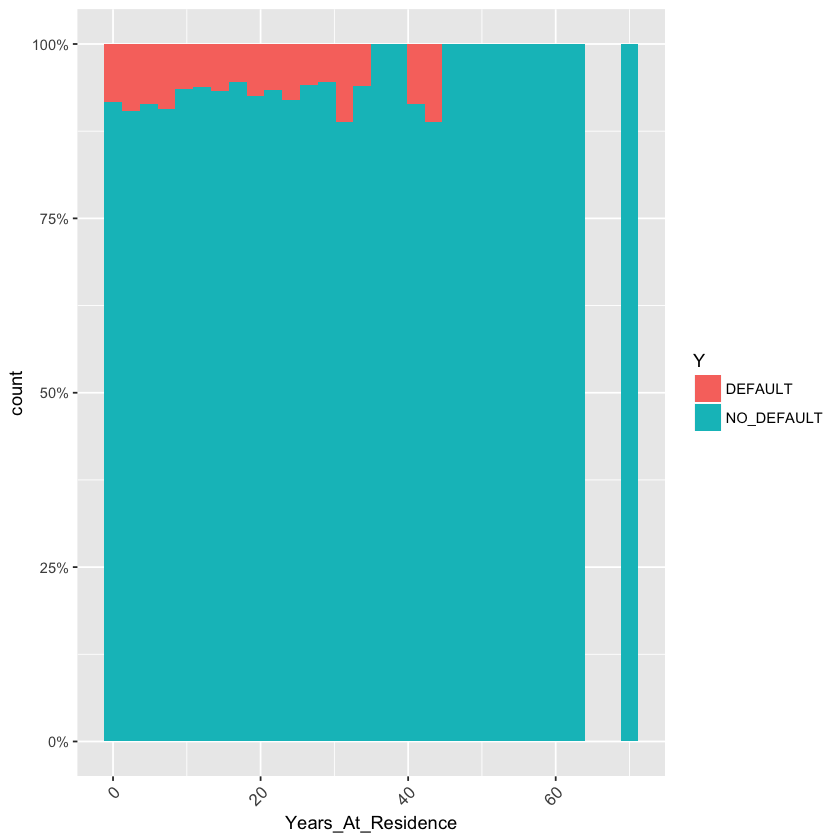

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


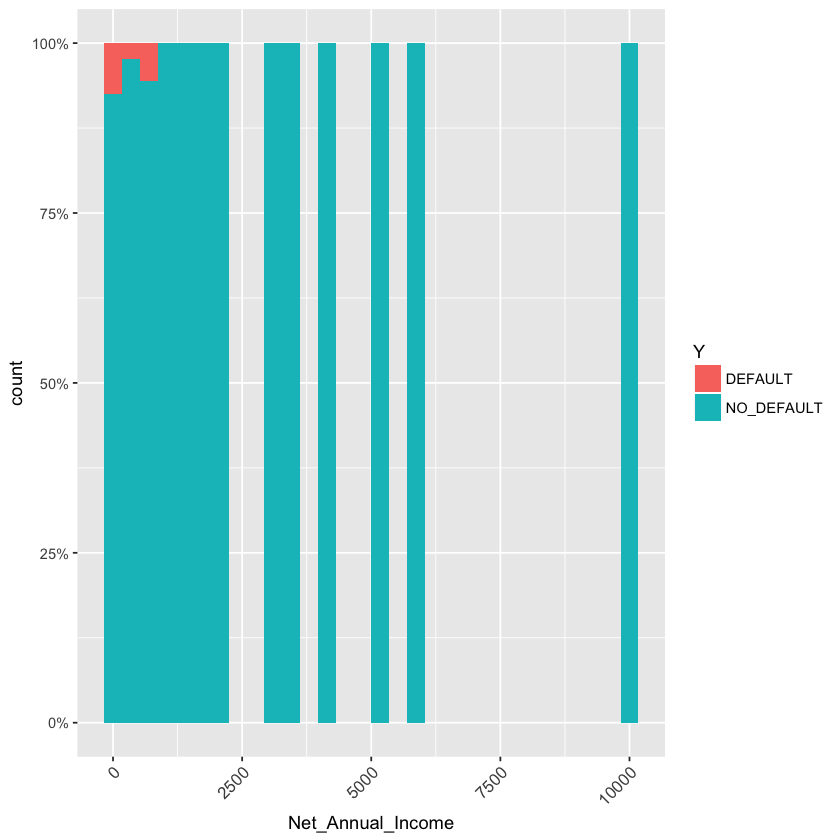

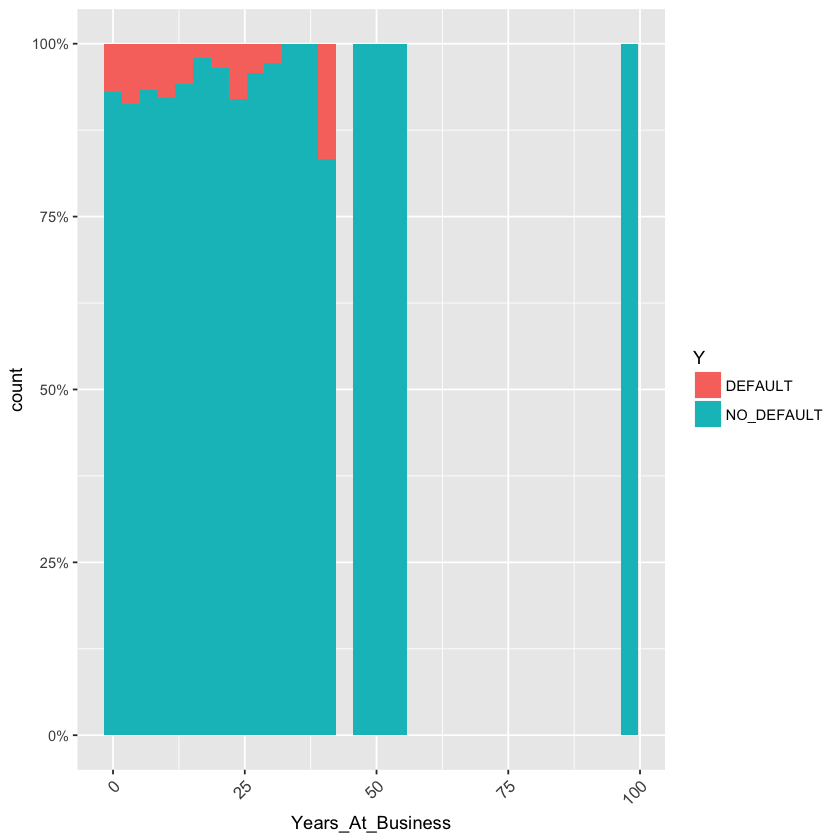

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


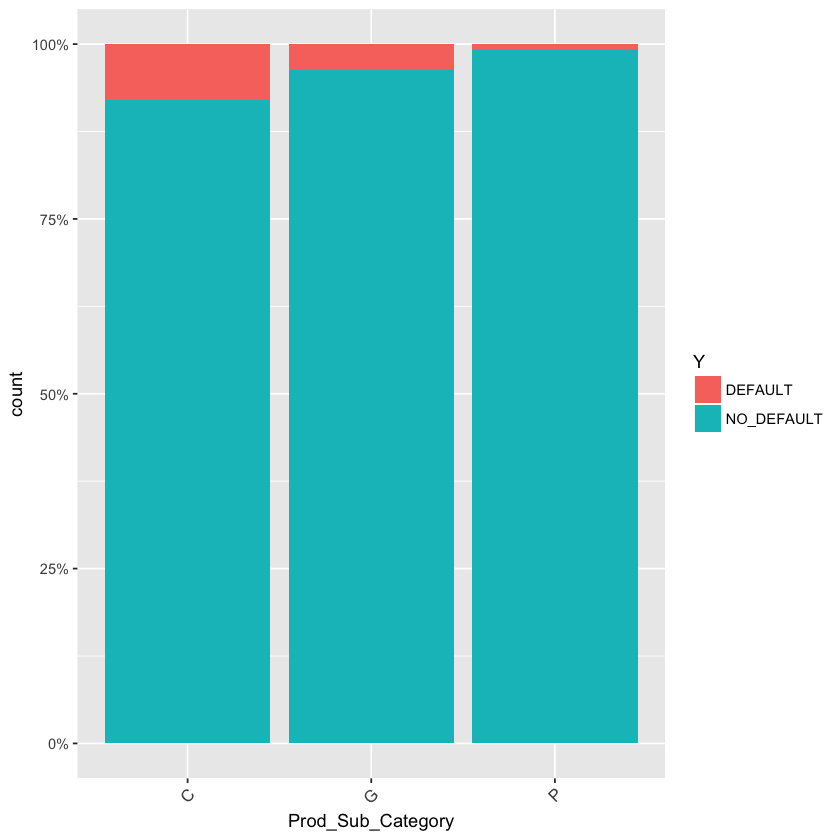

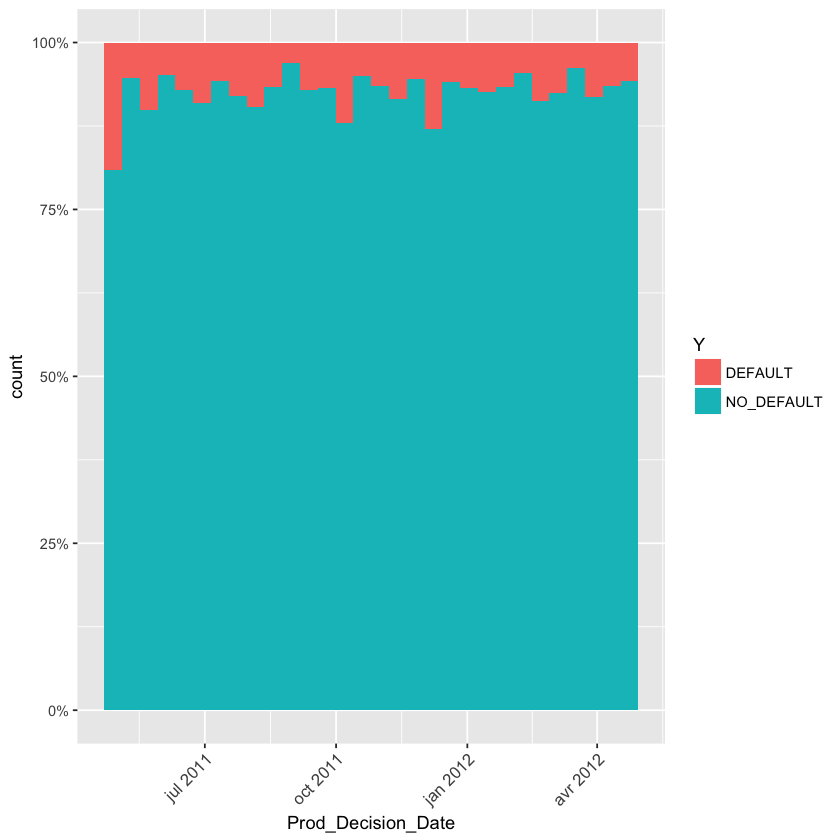

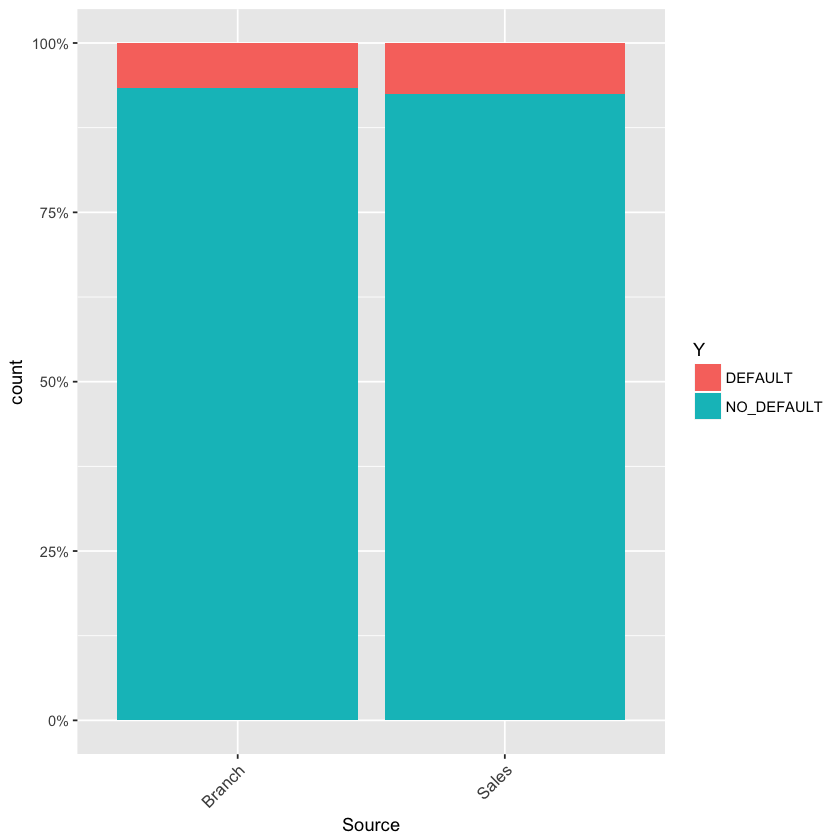

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


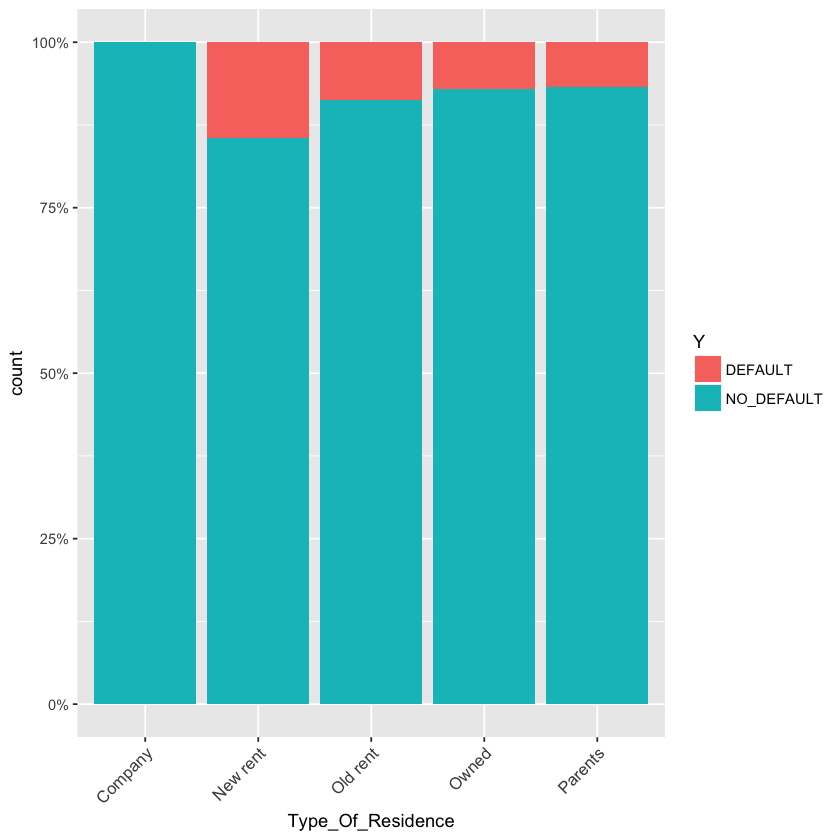

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


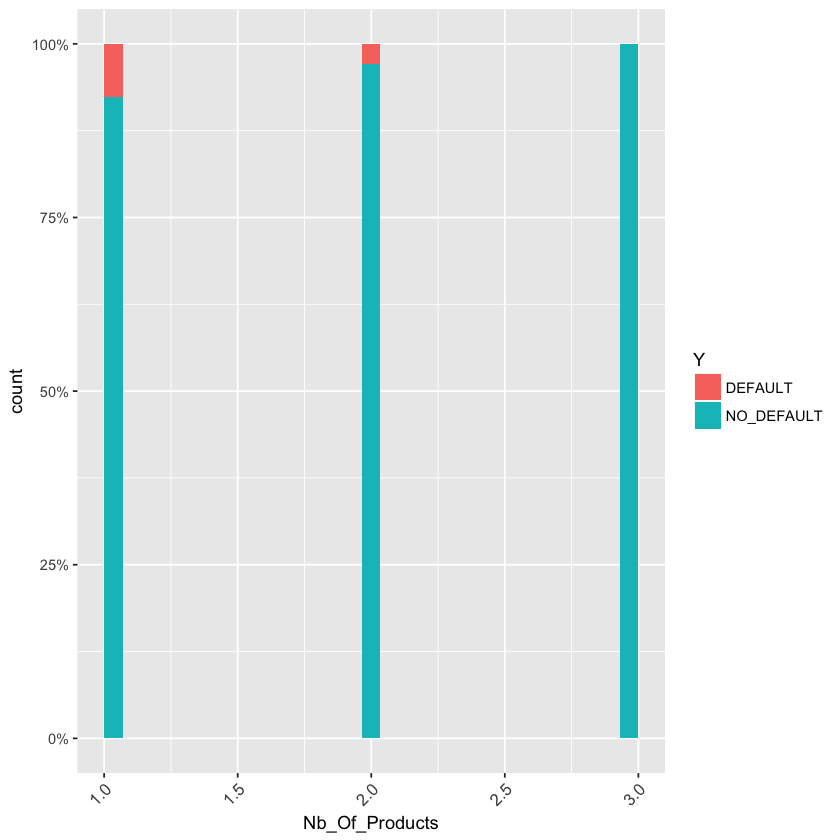

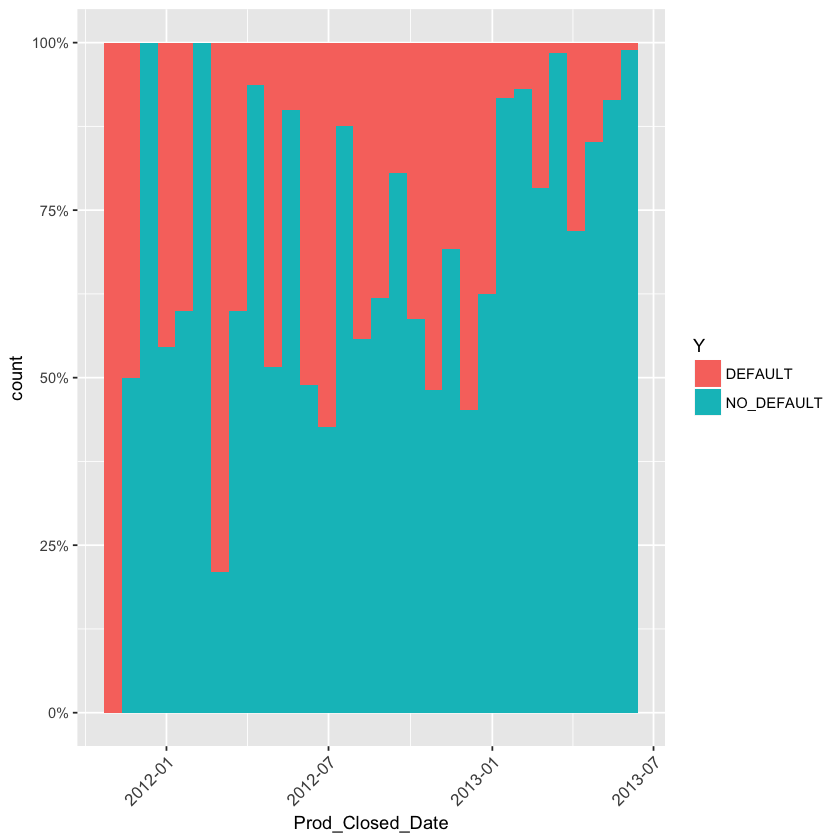

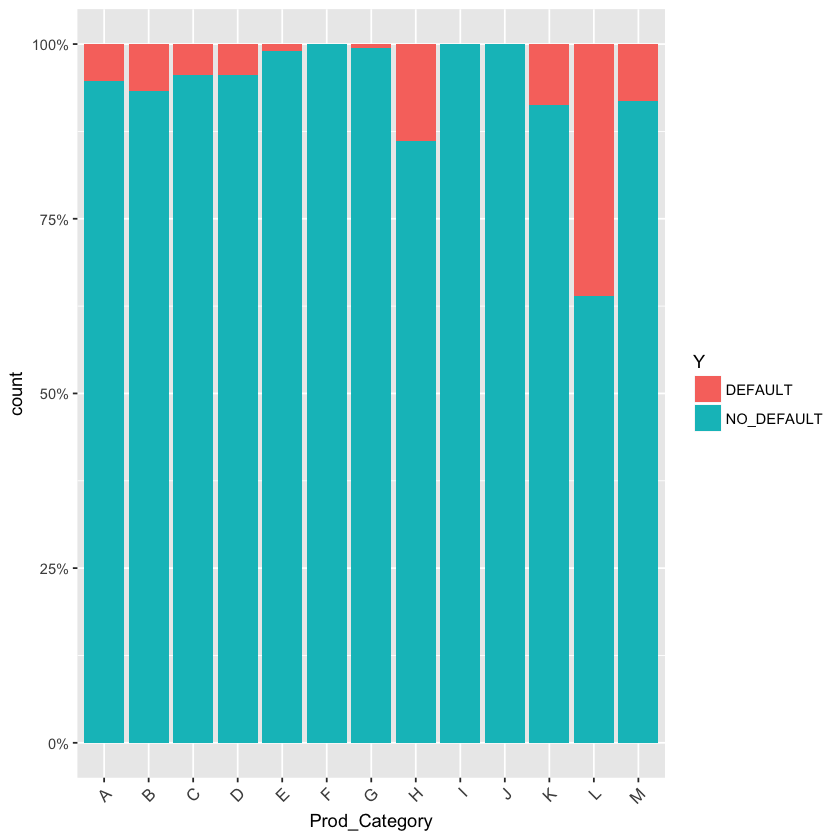

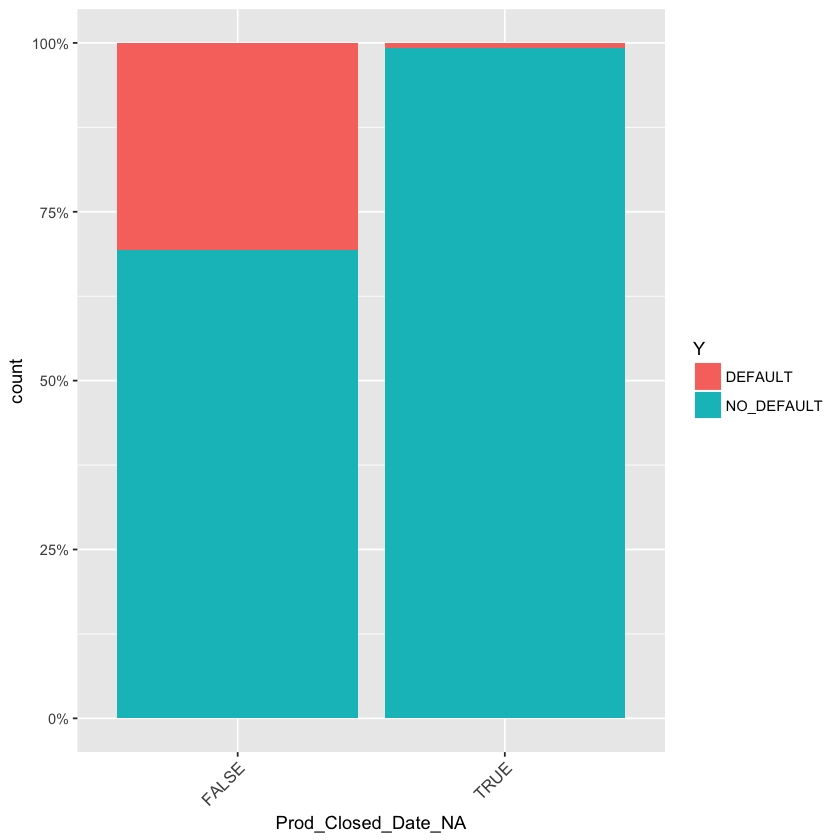

In [13]:
# See dependency between Y and other variables

library("scales")
nameCreditTraining <- names(CreditTraining)
for (varname in nameCreditTraining[-c(1,2)]) {
  p <- ggplot(data = CreditTraining, aes(x = get(varname), fill = Y)) + xlab(varname)
  switch(class(CreditTraining[[varname]]),
  logical = {p <- p + geom_bar(position = "fill")},
  numeric = {p <- p + geom_histogram(position = "fill")},
  Date = {p <- p + geom_histogram(position = "fill")},
  factor = {p <- p + geom_bar(position = "fill")},
  character = {p <- p + geom_bar(position = "fill")})
  
  print (p + scale_y_continuous(label = percent_format())    +  theme(axis.text.x =
            element_text(size  = 10,
                         angle = 45,
                         hjust = 1,
                         vjust = 1)) )
}


# Id Customer is useless in the prediction


CreditTraining <- dplyr::select(CreditTraining, -Id_Customer)

# CARET 

We will apply some machine learning algorithm using caret library in R

In [14]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(CreditTraining))

## set the seed to make your partition reproductible
set.seed(123)
train_ind <- sample(seq_len(nrow(CreditTraining)), size = smp_size)

train <- CreditTraining[train_ind, ]
test <- CreditTraining[-train_ind, ]


In [16]:
library(caret)
CreditGlm <- train(Y ~ ., data = train, method = "glm", metric = "Accuracy")
CreditGlm

Generalized Linear Model 

4035 samples
  18 predictor
   2 classes: 'DEFAULT', 'NO_DEFAULT' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 4035, 4035, 4035, 4035, 4035, 4035, ... 
Resampling results:

  Accuracy   Kappa  
  0.9459355  0.56944


# Make prediction using the Glm model

In [18]:
PredGlm <- predict(CreditGlm, newdata = train)
head(PredGlm)

[1] NO_DEFAULT NO_DEFAULT DEFAULT    NO_DEFAULT NO_DEFAULT NO_DEFAULT
Levels: DEFAULT NO_DEFAULT

In [21]:
ProbGlm <- predict(CreditGlm, newdata = train, type = "prob")
head(ProbGlm)

DEFAULT,NO_DEFAULT
0.001981447,0.9980186
0.003156142,0.9968439
0.618487101,0.3815129
0.012846785,0.9871532
0.003928193,0.9960718
0.010697684,0.9893023


For instance, one can impose a V-folds Cross Validation strategy with V=5 using the ‘trainControl’.

In [22]:
trControlCV <- trainControl(method = "CV",
                          number = 5)
CreditGlm <- train(Y ~ ., data = train, method = "glm",
                   trControl = trControlCV)
CreditGlm

Generalized Linear Model 

4035 samples
  18 predictor
   2 classes: 'DEFAULT', 'NO_DEFAULT' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3227, 3228, 3228, 3229, 3228 
Resampling results:

  Accuracy   Kappa    
  0.9482035  0.5863322


In [24]:
ProbGlm <- predict(CreditGlm, newdata = train, type = "prob")
head(ProbGlm)

DEFAULT,NO_DEFAULT
0.001981447,0.9980186
0.003156142,0.9968439
0.618487101,0.3815129
0.012846785,0.9871532
0.003928193,0.9960718
0.010697684,0.9893023


# Model Choice
Extract the accuracies for all the folds for a given model and the second one compute the average accuracy for each models.

In [25]:
ErrsCaret <- function(model, name) {
  Errs <- data.frame(model$resample)
  dplyr::mutate(Errs, model = name)
} 

ErrCaretAccuracy <- function(Errs) {
  Errs <- group_by(Errs, model)
  cbind(dplyr::summarize(Errs, mAccuracy = mean(Accuracy, na.rm = TRUE), mKappa = mean(Kappa, na.rm = TRUE),
                             sdAccuracy = sd(Accuracy, na.rm = TRUE), sdKappa = sd(Kappa, na.rm = TRUE)))
}

ErrsGlm <- ErrsCaret(CreditGlm, "Glm")
ErrsGlm

Accuracy,Kappa,Resample,model
0.9480198,0.5973135,Fold1,Glm
0.9504337,0.6034203,Fold2,Glm
0.9491945,0.6035443,Fold3,Glm
0.9491315,0.6099294,Fold4,Glm
0.9442379,0.5174535,Fold5,Glm


In [26]:
ErrGlm <- ErrCaretAccuracy(ErrsGlm)
ErrGlm

model,mAccuracy,mKappa,sdAccuracy,sdKappa
Glm,0.9482035,0.5863322,0.002375752,0.03876194


In [28]:
system.time(train(Y ~ ., data = train, method = "glm",
                   trControl = trControlCV))

   user  system elapsed 
  1.788   0.057   1.844 

In [32]:
#compute in parallel all the error estimates.
library("doFuture")
registerDoFuture()
plan(multiprocess)
system.time(train(Y ~ ., data = CreditTraining, method = "glm",
                   trControl = trControlCV))

   user  system elapsed 
  2.611   0.566   1.768 

# Testing glmnet (generalized linear model via penalized maximum likelihood)

In [37]:
CreditGlmnet <- train(Y ~ ., data = train, method = "glmnet",
                   trControl = trControlCV)
CreditGlmnet

glmnet 

4035 samples
  18 predictor
   2 classes: 'DEFAULT', 'NO_DEFAULT' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3228, 3229, 3227, 3228, 3228 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.10   0.0002660065  0.9479520  0.5737804
  0.10   0.0026600653  0.9474566  0.5598289
  0.10   0.0266006531  0.9439858  0.4493521
  0.55   0.0002660065  0.9481998  0.5763737
  0.55   0.0026600653  0.9482023  0.5622295
  0.55   0.0266006531  0.9363048  0.3384865
  1.00   0.0002660065  0.9484467  0.5776432
  1.00   0.0026600653  0.9486976  0.5611800
  1.00   0.0266006531  0.9303572  0.2099421

Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were alpha = 1 and lambda = 0.002660065.

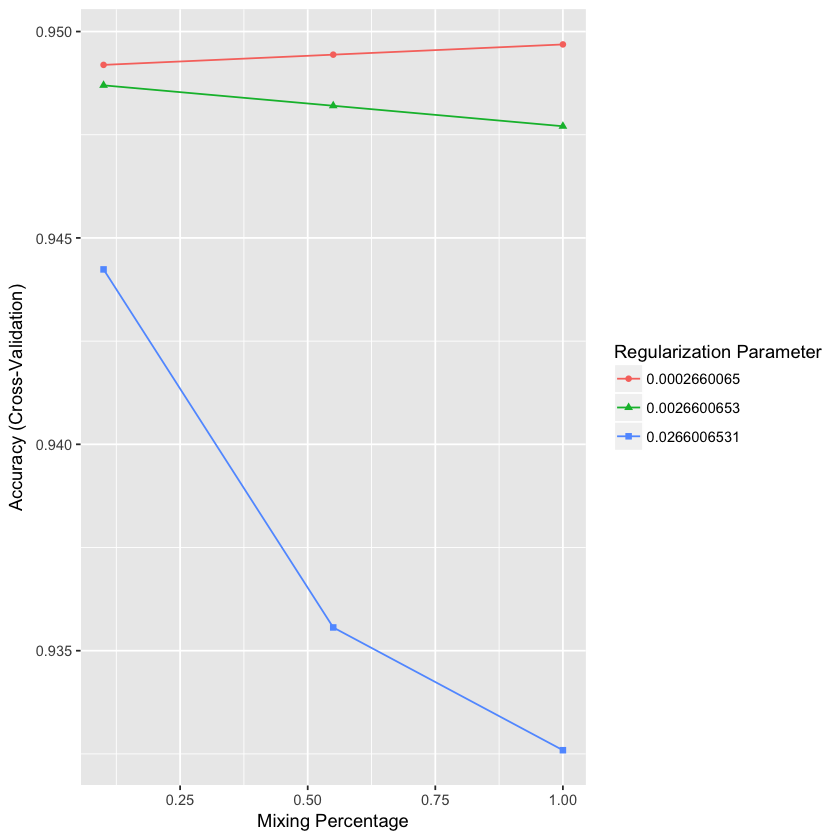

In [36]:
ggplot(CreditGlmnet)


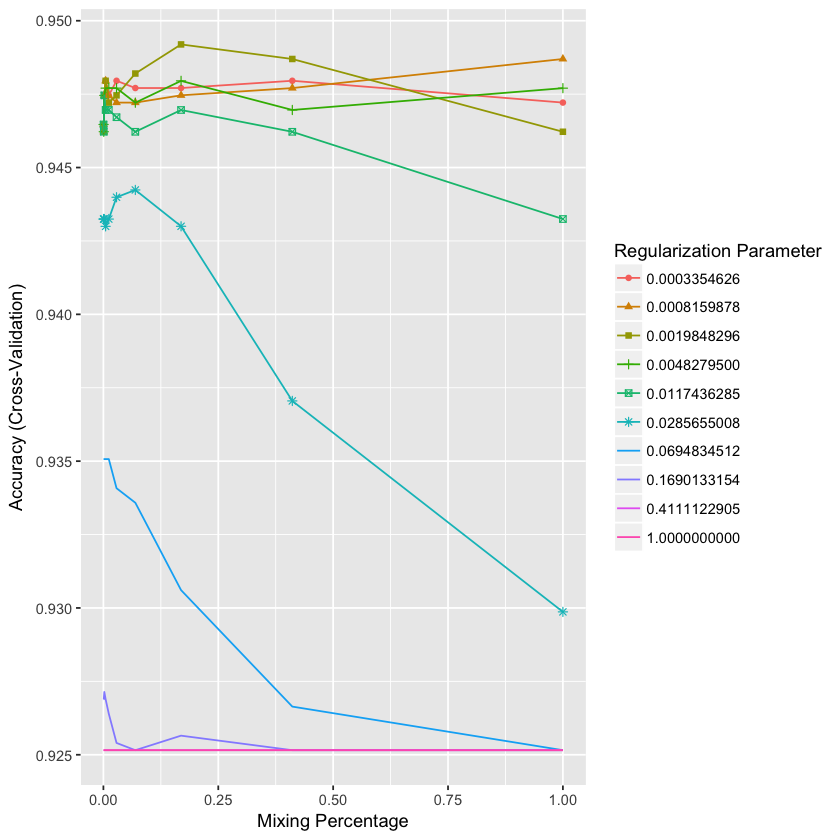

In [38]:
CreditGlmnet <- train(Y ~ ., data = train, method = "glmnet",
                   trControl = trControlCV,
                   tuneGrid  =  expand.grid(alpha = exp(seq(-8,0, length.out = 10)), 
                                          lambda = exp(seq(-8,0, length.out = 10))))
ggplot(CreditGlmnet)


# Compare Models

In [39]:
summary(resamples(list(Glm = CreditGlm, Glmnet = CreditGlmnet)))



Call:
summary.resamples(object = resamples(list(Glm = CreditGlm, Glmnet
 = CreditGlmnet)))

Models: Glm, Glmnet 
Number of resamples: 5 

Accuracy 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
Glm    0.9442  0.9480 0.9491 0.9482  0.9492 0.9504    0
Glmnet 0.9418  0.9479 0.9516 0.9492  0.9517 0.9530    0

Kappa 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
Glm    0.5175  0.5973 0.6034 0.5863  0.6035 0.6099    0
Glmnet 0.4560  0.5893 0.6036 0.5752  0.6100 0.6170    0


In [40]:
Errs <- ErrsCaret(CreditGlm, "Glm")
Errs <- rbind(Errs, ErrsCaret(CreditGlmnet, "Glmnet"))
Errs

Accuracy,Kappa,Resample,model
0.9480198,0.5973135,Fold1,Glm
0.9504337,0.6034203,Fold2,Glm
0.9491945,0.6035443,Fold3,Glm
0.9491315,0.6099294,Fold4,Glm
0.9442379,0.5174535,Fold5,Glm
0.9529703,0.6169565,Fold3,Glmnet
0.9417596,0.4559577,Fold2,Glmnet
0.9517327,0.5893025,Fold1,Glmnet
0.9516129,0.6100097,Fold4,Glmnet
0.9478908,0.6036251,Fold5,Glmnet


In [41]:
Err <- ErrCaretAccuracy(Errs)
Err

model,mAccuracy,mKappa,sdAccuracy,sdKappa
Glm,0.9482035,0.5863322,0.002375752,0.03876194
Glmnet,0.9491933,0.5751703,0.004569598,0.06741832
